In [1]:
# initialized connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2 as pg

In [2]:
# read pwd string from save file
with open('postgrest_pwd.txt', 'r') as f:
    pwd = f.readline()

In [6]:
# read data from table to datatframe with Month form 201801
table = 'mis_cc_kpi_m'
with pg.connect(database='ktc', user='postgres', password=pwd) as con:
    df = pd.read_sql('select * from ' + table + ' where "month"::bigint >= 201801', con = con)

## Oss Credit card by month
### Approved performance

#### Finalized

In [8]:
df_gr = df.groupby(['month', 'channel', 'channel_sub'])
df_gr['finalized'].sum().unstack(0).applymap("{:,d}".format)

month                201801  201802  201803  201804  201805
channel channel_sub                                        
OSS     Direct       17,962  21,491  21,146  16,711  22,006
        OSS_Tele      1,184   1,275   1,158   1,495   1,744
Tele    Telesales     3,677   4,752   5,913   4,476   6,444

#### Approve-new

In [9]:
df_gr['appr_new'].sum().unstack(0).applymap("{:,d}".format)

month               201801 201802 201803 201804 201805
channel channel_sub                                   
OSS     Direct       6,693  8,017  7,741  6,099  8,482
        OSS_Tele       530    496    459    607    790
Tele    Telesales    1,472  1,544  1,931  1,538  2,124

#### % Appr-rate

In [10]:
(df_gr['appr_new'].sum()/df_gr['finalized'].sum()).unstack(0).applymap("{:.0%}".format)

month               201801 201802 201803 201804 201805
channel channel_sub                                   
OSS     Direct         37%    37%    37%    36%    39%
        OSS_Tele       45%    39%    40%    41%    45%
Tele    Telesales      40%    32%    33%    34%    33%

#### Credit limit new

In [11]:
(df_gr['credit_limit_new'].sum()/df_gr['appr_new'].sum()).unstack(0).applymap("{:,.0f}".format)

month                201801  201802  201803  201804  201805
channel channel_sub                                        
OSS     Direct       51,233  53,753  46,022  53,392  50,258
        OSS_Tele     54,630  43,952  40,033  36,219  43,983
Tele    Telesales    52,739  52,141  50,016  46,664  47,761

#### % active60D

In [134]:
(df_gr['active60'].sum()/df_gr['appr_new'].sum()).unstack(0).applymap("{:.0%}".format)

Month               201801 201802 201803 201804
channel channel_sub                            
OSS     Direct         61%    62%    55%    23%
        OSS_Tele       71%    75%    65%    31%
Tele    Telesales      86%    86%    81%    37%

In [137]:
(df_gr['active60'].sum()/df_gr['appr_new'].sum()).unstack(0).applymap("{:.0%}".format)

Month               201801 201802 201803 201804
channel channel_sub                            
OSS     Direct         61%    62%    55%    23%
        OSS_Tele       71%    75%    65%    31%
Tele    Telesales      86%    86%    81%    37%

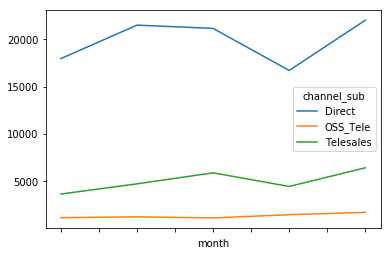

In [21]:
df.groupby(['channel_sub', 'month'])['finalized'].sum().unstack(0).plot()

In [251]:
df_gr[['finalized', 'appr_new']].sum().stack().unstack(0).applymap("{:,d}".format)

Month                          201801  201802  201803  201804
channel channel_sub                                          
OSS     Direct      finalized  17,962  21,490  21,146  16,711
                    appr_new    6,694   8,017   7,741   6,099
        OSS_Tele    finalized   1,184   1,275   1,158   1,495
                    appr_new      530     496     459     607
Tele    Telesales   finalized   3,677   4,752   5,913   4,476
                    appr_new    1,472   1,544   1,931   1,539

In [80]:
# group by , sum, reset MultiIndex -> DataFrame
i = df_gr[['finalized', 'appr', 'appr_new']].sum().reset_index()
# create per apr from appr_new / finalzied
i['per_apr'] = (i['appr_new']/i['finalized'])

In [82]:
# Set style
i.style.format({'finalized':"{:,.0f}", 'appr':"{:,.0f}", 'appr_new':"{:,.0f}"}).format({'per_apr':"{:,.0%}"})

,month,channel,channel_sub,finalized,appr,appr_new,per_apr
0,201801,OSS,Direct,"17,962","7,456","6,693",37%
1,201801,OSS,OSS_Tele,"1,184",546,530,45%
2,201801,Tele,Telesales,"3,677","1,568","1,472",40%
3,201802,OSS,Direct,"21,491","9,030","8,017",37%
4,201802,OSS,OSS_Tele,"1,275",512,496,39%
5,201802,Tele,Telesales,"4,752","1,982","1,544",32%
6,201803,OSS,Direct,"21,146","8,539","7,741",37%
7,201803,OSS,OSS_Tele,"1,158",471,459,40%
8,201803,Tele,Telesales,"5,913","2,416","1,931",33%
9,201804,OSS,Direct,"16,711","7,047","6,099",36%
